# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Get weather data
for city in cities:
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        id = weather_json['id']
        print(f'Processing data for city: {city}, id number: {id}')
        cityname.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        maxtemp.append(weather_json['main']['temp_max'])
        windspeed.append(weather_json['wind']['speed'])
    except (KeyError):
        print(f' No data found for {city}. Skipping')

#grab date data was gathered
date = dt.date.today()    

print('Finished')


Processing data for city: albany, id number: 5106834
 No data found for amderma. Skipping
Processing data for city: jamestown, id number: 2069194
Processing data for city: san quintin, id number: 1688687
Processing data for city: pisco, id number: 3932145
Processing data for city: waipawa, id number: 2185329
Processing data for city: thompson, id number: 6165406
Processing data for city: narsaq, id number: 3421719
Processing data for city: busselton, id number: 2075265
Processing data for city: ushuaia, id number: 3833367
Processing data for city: airai, id number: 1651810
Processing data for city: mataura, id number: 6201424
Processing data for city: coihaique, id number: 3894426
Processing data for city: maua, id number: 187231
Processing data for city: olinda, id number: 3650121
Processing data for city: aberdeen, id number: 5225857
 No data found for moulmeingyun. Skipping
 No data found for taolanaro. Skipping
Processing data for city: cape town, id number: 3369157
Processing data

Processing data for city: pangnirtung, id number: 6096551
Processing data for city: slave lake, id number: 6149374
Processing data for city: belmonte, id number: 8010472
Processing data for city: tigil, id number: 2120612
Processing data for city: beringovskiy, id number: 2126710
Processing data for city: wajima, id number: 1848976
Processing data for city: esperance, id number: 3573739
Processing data for city: sicamous, id number: 6147353
Processing data for city: pelym, id number: 1495385
Processing data for city: ixtapa, id number: 4004293
Processing data for city: te anau, id number: 2181625
Processing data for city: nanortalik, id number: 3421765
 No data found for porto santo. Skipping
Processing data for city: saskylakh, id number: 2017155
Processing data for city: kafanchan, id number: 2335713
 No data found for tumannyy. Skipping
Processing data for city: port hardy, id number: 6111862
Processing data for city: bilma, id number: 2446796
Processing data for city: shwebo, id nu

Processing data for city: rorvik, id number: 3141310
Processing data for city: torbay, id number: 6167817
Processing data for city: nikolskoye, id number: 546105
Processing data for city: seddon, id number: 6243926
Processing data for city: sydney mines, id number: 7303783
Processing data for city: darfield, id number: 2191913
Processing data for city: binzhou, id number: 1816336
Processing data for city: sur, id number: 286245
Processing data for city: padang, id number: 1633419
Processing data for city: murray bridge, id number: 2065176
Processing data for city: naryan-mar, id number: 523392
Processing data for city: san cosme y damian, id number: 3437107
Processing data for city: san patricio, id number: 3437029
Processing data for city: lavrentiya, id number: 4031637
Processing data for city: tadine, id number: 2138285
Processing data for city: mao, id number: 3496831
Processing data for city: tucumcari, id number: 5495360
Processing data for city: morondava, id number: 1058381
Pro

Processing data for city: mezen, id number: 527321
Processing data for city: marrakesh, id number: 2542997
 No data found for karauzyak. Skipping
Processing data for city: taksimo, id number: 2015701
Processing data for city: adrar, id number: 2508813
Processing data for city: saint-augustin, id number: 3031582
Processing data for city: faya, id number: 110690
 No data found for qui nhon. Skipping
Processing data for city: magadi, id number: 1264514
Processing data for city: jiuquan, id number: 1280957
Processing data for city: dalbandin, id number: 1180729
Processing data for city: sidi ali, id number: 2487130
Processing data for city: coffs harbour, id number: 2171085
Processing data for city: marfino, id number: 503977
Processing data for city: khora, id number: 259919
Processing data for city: meadow lake, id number: 6071421
Processing data for city: bemidji, id number: 5017822
Processing data for city: tera, id number: 146639
Processing data for city: miandrivazo, id number: 10590

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#build DataFrame
df = pd.DataFrame({'City': cityname,
             'Cloudiness': cloudiness,
             'Country': country,
             'Date': date,
             'Humidity': humidity,
             'Lat': lat,
             'Lng': lng,
             'Max Temp': maxtemp,
             'Wind Speed': windspeed
             })

#Save to CSV file
df.to_csv('WeatherData.csv', encoding='UTF-8', index=False)

In [11]:
#Show DataFrame
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,40,US,2019-03-06,34,42.65,-73.75,24.01,19.46
1,Jamestown,0,AU,2019-03-06,85,-33.21,138.60,42.55,6.87
2,San Quintin,0,PH,2019-03-06,83,17.54,120.52,64.15,2.39
3,Pisco,0,PE,2019-03-06,30,-13.71,-76.20,71.60,8.05
4,Waipawa,0,NZ,2019-03-06,59,-39.94,176.59,71.01,4.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

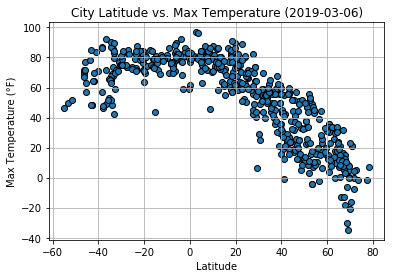

In [6]:
#plot 
plt.scatter(df['Lat'], df['Max Temp'], marker = 'o', edgecolors='black')

#plot elements
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid(True)

#Save plot image
plt.savefig('Latitude_vs_Max_Temp.png')

plt.show()

#### Latitude vs. Humidity Plot

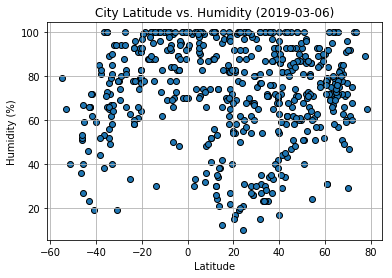

In [7]:
#plot 
plt.scatter(df['Lat'], df['Humidity'], marker = 'o', edgecolors='black')

#plot elements
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save plot image
plt.savefig('Latitude_vs_Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

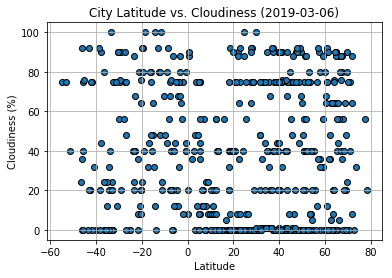

In [8]:
#plot 
plt.scatter(df['Lat'], df['Cloudiness'], marker = 'o', edgecolors='black')

#plot elements
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Save plot image
plt.savefig('Latitude_vs_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

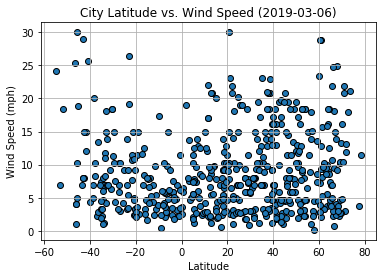

In [9]:
#plot 
plt.scatter(df['Lat'], df['Wind Speed'], marker = 'o', edgecolors='black')

#plot elements
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#Save plot image
plt.savefig('Latitude_vs_Wind_Speed.png')

plt.show()